In [1]:
from IPython import display
import matplotlib

import gymnasium as gym
import matplotlib.pyplot as plt
from collections import namedtuple
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import TensorBoardOutputFormat
from stable_baselines3.common.vec_env import SubprocVecEnv, VecMonitor
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_util import make_vec_env

2025-04-26 07:39:39.152214: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-26 07:39:39.158638: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745653179.165734  448963 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745653179.167875  448963 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745653179.173721  448963 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
%load_ext tensorboard
%matplotlib inline

In [3]:
env = make_vec_env("Pendulum-v1", n_envs=32, vec_env_cls=SubprocVecEnv)
env = VecMonitor(env)

model = A2C("MlpPolicy", env, tensorboard_log='runs', device="cpu")
model.learn(total_timesteps=10000000, progress_bar=True)
model.save("sb3_a2c_pendulum")

2025-04-26 07:39:41.957109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745653181.969553  449064 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745653181.973106  449064 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745653181.982351  449064 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745653181.982485  449064 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745653181.982498  449064 computation_placer.cc:177] computation placer alr

Output()

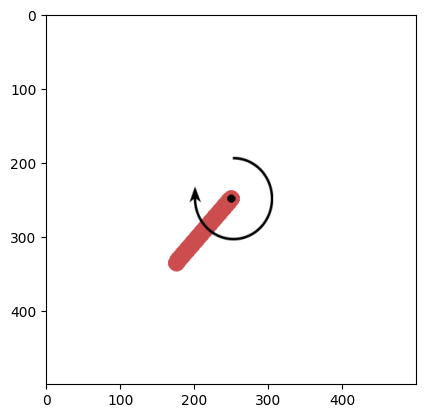

In [ ]:
env = gym.make('Pendulum-v1', render_mode='rgb_array')

obs, info = env.reset()
img = plt.imshow(env.render()) # only call this once

while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    if terminated or truncated:
        obs, info = env.reset()